In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2

In [2]:
erk.bond_price(5, 100, 0.05, 12,0.03)

0    109.275393
dtype: float64

In [6]:
rates, zc_prices = erk.cir(10, 500,b=0.03,r_0=0.03)

In [7]:
rates, zc_prices

(          0         1         2         3         4         5         6    \
 0    0.030000  0.030000  0.030000  0.030000  0.030000  0.030000  0.030000   
 1    0.031824  0.028373  0.032001  0.026815  0.031888  0.024814  0.034622   
 2    0.034278  0.024728  0.034237  0.029402  0.034495  0.023292  0.033693   
 3    0.032311  0.027395  0.031092  0.033352  0.035338  0.021121  0.031952   
 4    0.036216  0.028991  0.032633  0.030891  0.035472  0.018134  0.030394   
 ..        ...       ...       ...       ...       ...       ...       ...   
 116  0.044488  0.038113  0.082909  0.018147  0.028882  0.022149  0.026243   
 117  0.052275  0.038572  0.074261  0.017182  0.027141  0.021227  0.023875   
 118  0.049560  0.035669  0.074896  0.018290  0.023752  0.025972  0.022176   
 119  0.046459  0.033112  0.072341  0.016426  0.024322  0.025271  0.017186   
 120  0.044419  0.032217  0.069538  0.014695  0.024535  0.025619  0.013227   
 
           7         8         9    ...       490       491   

In [8]:
erk.bond_price(5, 100, 0.05, 12,rates.iloc[0][[1,2,3]]) #confirms that bond price at time 0 matches zero coupon prices

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [9]:
erk.bond_price(5, 100, 0.05, 12,rates.iloc[1][[1,2,3]])

1    110.070340
2    108.306433
3    110.837774
dtype: float64

In [10]:
#look at the head
# as interest rates start to move away from initial rate of 3%, bond prices change
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028373,0.032001,0.026815
2,0.024728,0.034237,0.029402
3,0.027395,0.031092,0.033352
4,0.028991,0.032633,0.030891


<Axes: >

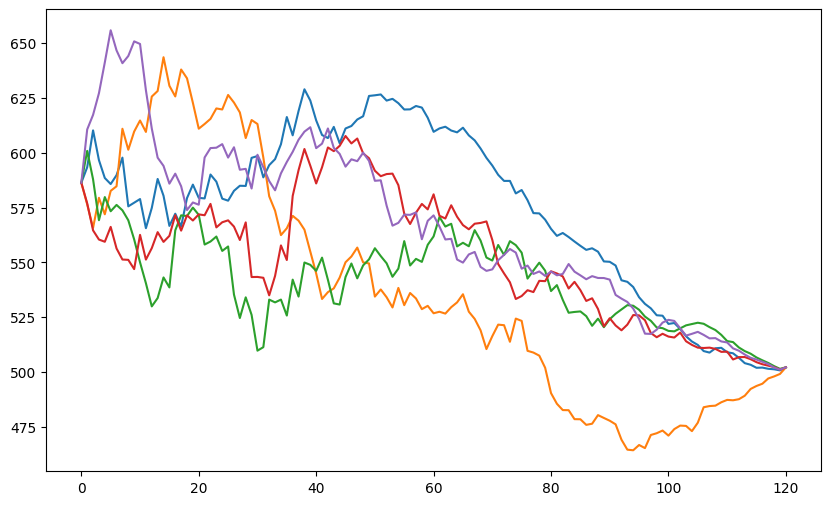

In [11]:
erk.bond_price(10, 500, 0.05, 12,rates[[1,2,3,4,5]]).plot(figsize=(10,6), legend=False)

In [12]:
prices = erk.bond_price(10, 100, 0.05, 12,rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.260292,117.260292,117.260292,117.260292,117.260292
1,118.674469,115.277231,120.169292,115.381045,122.120166
2,122.039773,113.144998,117.571256,112.914377,123.452295
3,119.322539,115.885808,113.84098,112.077683,125.426899
4,117.692277,114.381667,115.952018,111.874491,128.235748
...,...,...,...,...,...
116,100.393102,98.921708,101.057774,100.699727,100.924111
117,100.283865,99.400899,100.818114,100.568901,100.716781
118,100.237782,99.588924,100.527288,100.436175,100.399166
119,100.140347,99.814937,100.279397,100.213551,100.205642


In [ ]:
br = prices.pct_change().infer_objects(copy=False).dropna()
erk.annualize_rets(br, 12)

In [14]:
#these are negative as this is price return and does not include coupon payments
p = erk.bond_price(10, 100, 0.05, 12,rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

/Users/paulhake/Documents/claude_code_class/notebooks_and_codem01_v02/nb/edhec_risk_ph.py:821: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year
/Users/paulhake/Documents/claude_code_class/notebooks_and_codem01_v02/nb/edhec_risk_ph.py:821: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year
/Users/paulhake/Documents/claude_code_class/notebooks_and_codem01_v02/nb/edhec_risk_ph.py:821: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version 

1    0.028577
2    0.031923
3    0.031158
4     0.03033
dtype: object

In [22]:
price_10 = erk.bond_price(10, 100, 0.05, 12,rates)
price_10[[1,2,3]].tail()


,1,2,3
116,100.393102,98.921708,101.057774
117,100.283865,99.400899,100.818114
118,100.237782,99.588924,100.527288
119,100.140347,99.814937,100.279397
120,100.416667,100.416667,100.416667


In [23]:
price_30 = erk.bond_price(30, 100, 0.05, 12,rates)
price_30[[1,2,3]].tail()


,1,2,3
116,116.801628,67.704335,154.128803
117,116.043411,74.625723,156.094161
118,120.586367,74.134271,153.445919
119,124.749462,76.37195,157.400224
120,126.193145,78.923989,161.14849


In [30]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)

rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036018,0.003149,0.360968,3.266609,-0.001565,-0.001239,1.860197,0.0


In [31]:
price_eq = erk.gbm(10, 500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [32]:
rets_eq = price_eq.pct_change().infer_objects(copy=False).dropna()
rets_eq.shape

(120, 500)

In [33]:
rets_bonds.shape

(120, 500)

In [34]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.060533,0.00444,-0.282516,2.469423,-0.002697,-0.002301,6.692638,0.0


In [35]:
#naive risk budgeting strategies between PSP and GHP
def bt_mix(r1, r2, allocator, **kwargs):
    if not r1.shape == r2.shape:
        raise ValueError("Return series must have the same shape")
    weights = allocator(r1, r2, **kwargs)
    if not weights.shape == r1.shape:
        raise ValueError("Weights must have the same shape as return series")
    
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix

In [36]:
def fixed_allocator(r1, r2, w1=0.5, **kwargs):
    return pd.DataFrame(w1, index=r1.index, columns=r1.columns)

In [58]:
rates, zc_prices = erk.cir(10, 500,b=0.03,r_0=0.03)
price_10 = erk.bond_price(10, 100, 0.05, 12,rates)
price_30 = erk.bond_price(30, 100, 0.05, 12,rates)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_bonds = erk.bt_mix(rets_10, rets_30, erk.fixedmix_allocator, w1=0.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035595,0.003289,0.217441,2.61975,-0.001416,-0.001211,1.655599,0.0


In [59]:
price_eq = erk.gbm(10, 500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().infer_objects(copy=False).dropna()
rets_zc = zc_prices.pct_change().infer_objects(copy=False).dropna()

In [41]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, erk.fixedmix_allocator, w1=0.7)
mean_rets_7030b = rets_7030b.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_7030b))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.05971,0.004423,-0.305894,2.950783,-0.002644,-0.002033,6.537564,0.0


In [60]:
summaries = erk.summary_stats(rets_7030b)
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.043313,0.105376,0.072983,2.746672,0.045354,0.055986,0.122831,-0.187839
1,0.088816,0.103998,0.338611,2.799441,0.038797,0.047064,0.550338,-0.191750
2,0.064457,0.101284,0.412246,2.856704,0.038833,0.043938,0.330996,-0.152881
3,0.058035,0.119494,-0.416436,3.585180,0.054745,0.074668,0.228199,-0.227281
4,0.048931,0.119248,0.193536,2.647366,0.050148,0.060097,0.154366,-0.317994


In [61]:
summaries.mean()

Annualized Return          0.054234
Annualized Vol             0.107045
Skewness                   0.016739
Kurtosis                   2.940746
Cornish-Fisher VaR (5%)    0.045636
Historic CVaR (5%)         0.057638
Sharpe Ratio               0.221496
Max Drawdown              -0.206556
dtype: float64

In [62]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="EQ"),
    erk.terminal_stats(rets_7030b, name="70/30 EQ/FI")
], axis=1)

,FI,EQ,70/30 EQ/FI
mean,1.380153,1.969518,1.774385
std,0.113618,0.928205,0.567766
p_breach,NaN,0.042000,0.010000
e_short,NaN,0.126646,0.105960
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


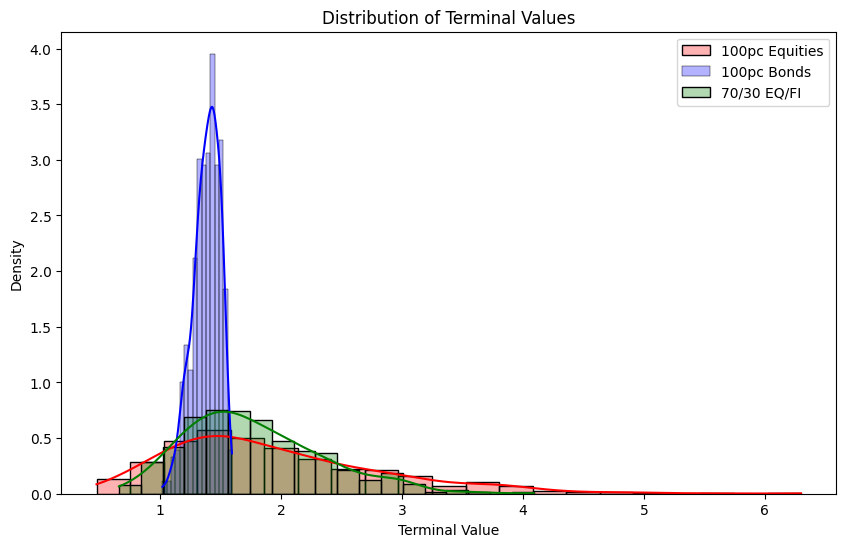

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(erk.terminal_values(rets_eq), color='red', label='100pc Equities', kde=True, stat='density', alpha=0.3)
sns.histplot(erk.terminal_values(rets_bonds), color='blue', label='100pc Bonds', kde=True, stat='density', alpha=0.3)
sns.histplot(erk.terminal_values(rets_7030b), color='green', label='70/30 EQ/FI', kde=True, stat='density', alpha=0.3)
plt.legend()
plt.xlabel('Terminal Value')
plt.ylabel('Density')
plt.title('Distribution of Terminal Values');

In [50]:
# Glide paths for allocation
def glidepath_allocator(r1, r2, start_w1=0.8, end_w1=0.2):
    n_periods = r1.shape[0]
    w1_values = np.linspace(start_w1, end_w1, n_periods)
    weights = pd.DataFrame(
        np.tile(w1_values[:, np.newaxis], (1, r1.shape[1])),
        index=r1.index,
        columns=r1.columns
    )
    return weights

In [63]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, erk.glidepath_allocator, start_glide=0.8, end_glide=0.2)

pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="EQ"),
    erk.terminal_stats(rets_7030b, name="70/30 EQ/FI"),
    erk.terminal_stats(rets_g8020, name="Glidepath 80/20 to 20/80 EQ/FI")
], axis=1)

,FI,EQ,70/30 EQ/FI,Glidepath 80/20 to 20/80 EQ/FI
mean,1.380153,1.969518,1.774385,1.669828
std,0.113618,0.928205,0.567766,0.429900
p_breach,NaN,0.042000,0.010000,0.004000
e_short,NaN,0.126646,0.105960,0.046435
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
